Tarquin Bennett

# Question 1

In [27]:
import numpy as np 
from matplotlib import pyplot as plt 

def sigmoid(z): 
    return 1 / (1 + np.exp(-z)) 

# Initialization of the neural network parameters 
# Initialized all the weights in the range of between 0 and 1 
# Bias values are initialized to 0 
def initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures): 
    W1 = np.random.randn(neuronsInHiddenLayers, inputFeatures) 
    W2 = np.random.randn(outputFeatures, neuronsInHiddenLayers) 
    b1 = np.zeros((neuronsInHiddenLayers, 1)) 
    b2 = np.zeros((outputFeatures, 1)) 

    parameters = {"W1" : W1, "b1": b1, 
                "W2" : W2, "b2": b2} 
    return parameters 


def forwardPropagation(X, Y, parameters): 
    m = X.shape[1] 
    W1 = parameters["W1"] 
    W2 = parameters["W2"] 
    b1 = parameters["b1"] 
    b2 = parameters["b2"] 

    Z1 = np.dot(W1, X) + b1 
    A1 = sigmoid(Z1) 
    Z2 = np.dot(W2, A1) + b2 
    A2 = sigmoid(Z2) 

    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2) 
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y)) 
    cost = -np.sum(logprobs) / m 
    return cost, cache, A2 

def backwardPropagation(X, Y, cache): 
    m = X.shape[1] 
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache 

    dZ2 = A2 - Y 
    dW2 = np.dot(dZ2, A1.T) / m 
    db2 = np.sum(dZ2, axis = 1, keepdims = True) 

    dA1 = np.dot(W2.T, dZ2) 
    dZ1 = np.multiply(dA1, A1 * (1- A1)) 
    dW1 = np.dot(dZ1, X.T) / m 
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / m 

    gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2, 
                "dZ1": dZ1, "dW1": dW1, "db1": db1} 
    return gradients 

# Updating the weights based on the negative gradients 
def updateParameters(parameters, gradients, learningRate): 
    parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"] 
    parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"] 
    parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"] 
    parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"] 
    return parameters

# Model to learn the XOR truth table 
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # XOR input 
Y = np.array([[0, 1, 1, 0]]) # XOR output 

# Define model parameters 
neuronsInHiddenLayers = 2 # number of hidden layer neurons (2) 
inputFeatures = X.shape[0] # number of input features (2) 
outputFeatures = Y.shape[0] # number of output features (1) 
parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures) 
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1)) 

for i in range(epoch): 
    losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters) 
    gradients = backwardPropagation(X, Y, cache) 
    parameters = updateParameters(parameters, gradients, learningRate) 

# Testing 
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) # XOR input 
cost, _, A2 = forwardPropagation(X, Y, parameters) 
prediction = (A2 > 0.5) * 1.0
# print(A2)
print(prediction) 

[[1. 0. 0. 1.]]


The activation function used was the sigmoid function. The wights were random numbers between 0 and 1, and bias starts at 0. Then for the the model is trained for some number, epoch, times and once that is done the parameters will be very accurate. Using forward propagation, which predicts the output, and backward propagation, which goes back knowing the output and adjust the bias and weights. Once that is done we test the model to see how well it does. With this model, the prediction ends up being correct. To be noted, if the learning rate and/or epoch is changed the accuracy will change and either get worst or better.

# Question 2

### 5.1

1. I/PRP need/VBP a/DT flight/NN from/IN Atlanta/NN
2. Does/VBZ this/DT flight/NN serve/VB dinner/NNS
3. I/PRP have/VB a/DT friend/NN living/VBG in/IN Denver/NNP
4. Can/VBPyou/PRPlist/VBthe/DTnonstop/JJafternoon/NNflights/NNS

1. Atlanta is not NN it is NNP
2. dinner is not NNS it is NN
3. living is not VBG it is NN
4. can is not VBP it is MD

### 5.2

1. It/PRP is/VB a/DT nice/JJ night/NN.
2. This/DT crap/JJ game/NN is/DT over/IN a/DT garage/NN in/IN Fifty-second/CD Street/NNP. . .
3. ...Nobody/NN ever/RB takes/VBZ the/DT newspapers/NN she/PRP sells/VBZ...
4. He/PRP is/VBZ a/DT tall/JJ, skinny/JJ guy/NN with/IN a/DT long/RB, sad/JJ, mean-looking/JJ kisser/NN, and/CC a/DT mournful/JJ voice/NN.
5. ...I/PRP am/VB sitting/VBG in/DT Mindy/NNP ’s/POS restaurant/NN putting/VBG on/IN the/DT gefillte/JJ fish/NN,which/WDT is/VBZ a/DT dish/NN I/PRP am/VB very/JJ fond/JJ of/IN, ...
6. When/WRB a/DT guy/NN and/CC a/DT doll/NN get/VB to/TO taking/VBG peeks/VBZ back/RB and/CC forth/RB at/IN each/DT other/JJ, why/WRB there/EX you/PRP are/VBP indeed/RB.

### 5.3

We disagreed on 'back' and 'forth' from 6. It is because they do not follow the general rule of being an adverb, that being ending in 'ly'.

### 5.11

In [7]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('big.txt').read()))

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or know(edits3(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

def edits3(word):
    return (e3 for e3 in edits2(word))

By adding edits3 we now can get all words that are two edits away from 'word'. this is helpful cause that leads to less un-correct corrections.

# Question 3 

### Your Turn 1

In [5]:
import nltk

text1 = nltk.word_tokenize("My conduct is always professional.")
text2 = nltk.word_tokenize("I conduct myself in a professional manner.")

text3 = nltk.word_tokenize("She asked for a refund because the product was defective.")
text4 = nltk.word_tokenize("Should we refund their money?")

print(nltk.pos_tag(text1))
print(nltk.pos_tag(text2))
print()
print(nltk.pos_tag(text3))
print(nltk.pos_tag(text4))

[('My', 'PRP$'), ('conduct', 'NN'), ('is', 'VBZ'), ('always', 'RB'), ('professional', 'JJ'), ('.', '.')]
[('I', 'PRP'), ('conduct', 'VBP'), ('myself', 'PRP'), ('in', 'IN'), ('a', 'DT'), ('professional', 'JJ'), ('manner', 'NN'), ('.', '.')]

[('She', 'PRP'), ('asked', 'VBD'), ('for', 'IN'), ('a', 'DT'), ('refund', 'NN'), ('because', 'IN'), ('the', 'DT'), ('product', 'NN'), ('was', 'VBD'), ('defective', 'JJ'), ('.', '.')]
[('Should', 'MD'), ('we', 'PRP'), ('refund', 'VB'), ('their', 'PRP$'), ('money', 'NN'), ('?', '.')]


The words dont change meaning but their parts of speech do change. That has to do with their placement and surrounding words. Also when speaking different syllables are stressed.

### Your Turn 2

100554
[('NOUN', 30654), ('VERB', 14399), ('ADP', 12355), ('.', 11928), ('DET', 11389), ('ADJ', 6706), ('ADV', 3349), ('CONJ', 2717), ('PRON', 2535), ('PRT', 2264), ('NUM', 2166), ('X', 92)]


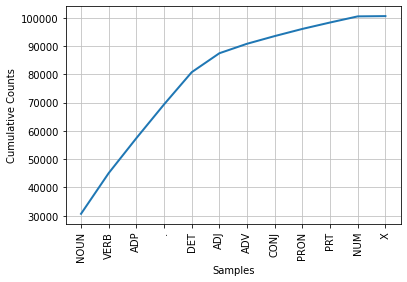

In [13]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
tot = len(brown_news_tagged)
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
print(tag_fd.most_common())
tag_fd.plot(cumulative=True)

In [16]:
percent = []
for tag in tag_fd.most_common():
    percent.append(tag[1]/tot)
print(percent[:5])

[0.30485112476878096, 0.1431966903355411, 0.12286930405553236, 0.11862282952443463, 0.11326252560813095]


above are the percent of the first five tags above. This makes sense since 30% of words are nouns and nouns are the biggest group of words. and then next is verbs.

### Your Turn 3

In [29]:
wsj = nltk.corpus.treebank.tagged_words()
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)
lst = []
lstPP = list(cfd2['VBN'])

for i in lstPP[:50]:
    idx = wsj.index((i,'VBN'))
    lst.append(wsj[idx-1])
print(lst)

[('had', 'VBD'), ('the', 'DT'), ('collections', 'NNS'), (',', ','), (',', ','), ('once', 'RB'), ('supercomputers', 'NNS'), ('were', 'VBD'), ('was', 'VBD'), ('are', 'VBP'), ('was', 'VBD'), ('were', 'VBD'), ('is', 'VBZ'), ('was', 'VBD'), ('publicly', 'RB'), ('gradually', 'RB'), ('had', 'VBD'), ('Documents', 'NNS'), ('be', 'VB'), ('been', 'VBN'), ('fields', 'NNS'), ("n't", 'RB'), ('were', 'VBD'), ('has', 'VBZ'), ('has', 'VBZ'), ('been', 'VBN'), (',', ','), ('was', 'VBD'), ('has', 'VBZ'), ('is', 'VBZ'), ('be', 'VB'), (',', ','), ('has', 'VBZ'), ('have', 'VBP'), ('has', 'VBZ'), ('are', 'VBP'), ('was', 'VBD'), ('ever', 'RB'), ('convertible', 'JJ'), ('group', 'NN'), ('amount', 'NN'), ('a', 'DT'), ('*RNR*-1', '-NONE-'), ('has', 'VBZ'), ('fraud', 'NN'), ("n't", 'RB'), ('was', 'VBD'), ('were', 'VBD'), ("n't", 'RB'), ('was', 'VBD')]


Above is the first 50 items in the list, and this shows us that a big group of words that immediately precede are past tense verbs.

### Your Turn 4 

In [31]:
nltk.app.concordance()

This is a great way to see how words can have different parts of speech and how the surrounding words change it.

# Question 4

In [33]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [54]:
text = nltk.corpus.gutenberg.raw('melville-moby_dick.txt')
sents = nltk.sent_tokenize(text)
longSent = max(sents, key=len)
length = len(longSent.split(' '))
print(length,longSent)

425 Though in many natural objects, whiteness refiningly enhances beauty,
as if imparting some special virtue of its own, as in marbles,
japonicas, and pearls; and though various nations have in some way
recognised a certain royal preeminence in this hue; even the
barbaric, grand old kings of Pegu placing the title "Lord of the
White Elephants" above all their other magniloquent ascriptions of
dominion; and the modern kings of Siam unfurling the same snow-white
quadruped in the royal standard; and the Hanoverian flag bearing the
one figure of a snow-white charger; and the great Austrian Empire,
Caesarian, heir to overlording Rome, having for the imperial colour
the same imperial hue; and though this pre-eminence in it applies to
the human race itself, giving the white man ideal mastership over
every dusky tribe; and though, besides, all this, whiteness has been
even made significant of gladness, for among the Romans a white stone
marked a joyful day; and though in other mortal sympathi

In [55]:
def longestSent(book):
    sentEnders = ['.','!','?']
    lst = [w for w in book]
    totalCount=[]
    currCount=0
    currSent=[]
    for i in lst:
        if i in sentEnders:
            totalCount.append((currCount,currSent))
            currCount, currSent = 0,[]
        else:
            currCount+=1
            currSent.append(i)
    return max(totalCount)
longestSent(text1)

(453,
 ['Though',
  'in',
  'many',
  'natural',
  'objects',
  ',',
  'whiteness',
  'refiningly',
  'enhances',
  'beauty',
  ',',
  'as',
  'if',
  'imparting',
  'some',
  'special',
  'virtue',
  'of',
  'its',
  'own',
  ',',
  'as',
  'in',
  'marbles',
  ',',
  'japonicas',
  ',',
  'and',
  'pearls',
  ';',
  'and',
  'though',
  'various',
  'nations',
  'have',
  'in',
  'some',
  'way',
  'recognised',
  'a',
  'certain',
  'royal',
  'preeminence',
  'in',
  'this',
  'hue',
  ';',
  'even',
  'the',
  'barbaric',
  ',',
  'grand',
  'old',
  'kings',
  'of',
  'Pegu',
  'placing',
  'the',
  'title',
  '"',
  'Lord',
  'of',
  'the',
  'White',
  'Elephants',
  '"',
  'above',
  'all',
  'their',
  'other',
  'magniloquent',
  'ascriptions',
  'of',
  'dominion',
  ';',
  'and',
  'the',
  'modern',
  'kings',
  'of',
  'Siam',
  'unfurling',
  'the',
  'same',
  'snow',
  '-',
  'white',
  'quadruped',
  'in',
  'the',
  'royal',
  'standard',
  ';',
  'and',
  'the',
  

These are the same sentence. The original method did stop shorter because of the word "St." since there is a period. The count also included punctuation that wasnt a sentence ender. However the new method has to use the raw text so stuff such as "\n,\t,\r" are shown so some words get combined since that is suppose to be used as a word separator. 